In [221]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [222]:
df = pd.read_csv('FinalProjectData/Study_B.csv')
df = df[df['LeadStatus'] != 'Flagged']

In [223]:
df[df['TxGroup'] == 'Control']

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
18,B,India,20003,40040,60002,201749,Control,0,4,3,...,1,3,3,3,3,3,3,3,79,Passed
35,B,USA,20007,40039,60034,201446,Control,0,4,3,...,3,3,3,5,3,3,3,4,94,Passed
36,B,USA,20007,40039,60034,200554,Control,17,4,3,...,3,3,4,5,3,4,3,4,102,Passed
37,B,India,20008,40003,60016,200111,Control,0,4,1,...,1,2,4,2,3,3,2,1,88,Assign to CS
38,B,India,20008,40003,60016,201428,Control,18,4,1,...,1,2,3,2,3,3,2,2,82,Assign to CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,B,Ukraine,20240,40011,60017,201875,Control,33,4,3,...,3,3,3,4,3,2,4,3,91,Passed
1880,B,Ukraine,20240,40011,60017,200773,Control,47,3,3,...,3,3,3,3,2,3,3,3,81,Passed
1881,B,Ukraine,20240,40011,60017,200977,Control,75,3,3,...,3,3,3,3,3,4,2,3,83,Passed
1883,B,Ukraine,20240,40011,60017,200491,Control,168,3,3,...,2,3,2,3,3,2,2,3,76,Passed


In [224]:
df[df['TxGroup'] == 'Treatment']

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
0,B,Russia,20001,40032,60057,201017,Treatment,0,2,2,...,2,1,3,3,3,3,3,4,73,Assign to CS
1,B,Russia,20001,40032,60057,201860,Treatment,7,2,2,...,2,1,3,3,3,3,3,4,75,Assign to CS
2,B,Russia,20001,40032,60057,200679,Treatment,13,2,2,...,2,1,3,3,3,3,3,3,73,Assign to CS
3,B,Russia,20001,40032,60057,200129,Treatment,20,2,2,...,2,1,3,3,3,3,3,3,73,Assign to CS
4,B,Russia,20001,40032,60057,200930,Treatment,34,1,1,...,2,1,3,3,3,3,3,3,65,Assign to CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,B,Russia,20235,40009,60048,200951,Treatment,34,2,3,...,2,1,3,2,3,1,1,2,55,Passed
1837,B,Russia,20235,40009,60048,200257,Treatment,63,2,3,...,2,1,2,2,3,1,1,2,53,Passed
1838,B,Russia,20235,40009,60048,201720,Treatment,104,2,3,...,3,1,2,2,3,1,1,3,56,Passed
1839,B,Russia,20235,40009,60048,201719,Treatment,147,2,3,...,2,1,2,2,3,1,1,3,56,Passed


In [225]:
df_panss = df[['PatientID', 'VisitDay', 'PANSS_Total']][df['TxGroup'] == 'Treatment']

In [226]:
df_panss

,PatientID,VisitDay,PANSS_Total
0,20001,0,73
1,20001,7,75
2,20001,13,73
3,20001,20,73
4,20001,34,65
...,...,...,...
1836,20235,34,55
1837,20235,63,53
1838,20235,104,56
1839,20235,147,56


In [227]:
df_panss_diff = pd.DataFrame(columns=['PatientID', 'PANSS_Total_Diff'])

for patient_id in df_panss['PatientID'].unique():
    patient_panss = df_panss[df_panss['PatientID'] == patient_id]
    patient_panss_diff = patient_panss.iloc[-1]['PANSS_Total'] - patient_panss.iloc[0]['PANSS_Total']
    df_panss_diff = df_panss_diff.append({'PatientID': patient_id, 'PANSS_Total_Diff': patient_panss_diff}, ignore_index=True)
    
df_panss_diff

,PatientID,PANSS_Total_Diff
0,20001,-13
1,20002,-10
2,20004,0
3,20005,-10
4,20006,-16
...,...,...
112,20223,-13
113,20224,-29
114,20226,-36
115,20228,-24


In [228]:
df_panss_diff['Effective'] = df_panss_diff['PANSS_Total_Diff'] <= 0
df_panss_diff

,PatientID,PANSS_Total_Diff,Effective
0,20001,-13,True
1,20002,-10,True
2,20004,0,True
3,20005,-10,True
4,20006,-16,True
...,...,...,...
112,20223,-13,True
113,20224,-29,True
114,20226,-36,True
115,20228,-24,True


True     112
False      5
Name: Effective, dtype: int64 

True     0.957265
False    0.042735
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Treatment Group')

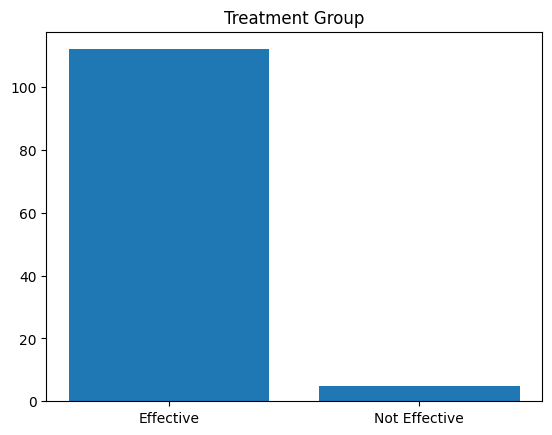

In [229]:
print(df_panss_diff['Effective'].value_counts(), '\n')
print(df_panss_diff['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_diff[df_panss_diff['Effective'] == True]), len(df_panss_diff[df_panss_diff['Effective'] == False])])
plt.title('Treatment Group')

In [230]:
df_panss_control = df[['PatientID', 'VisitDay', 'PANSS_Total']][df['TxGroup'] == 'Control']

df_panss_control_diff = pd.DataFrame(columns=['PatientID', 'PANSS_Total_Diff'])

for patient_id in df_panss_control['PatientID'].unique():
    patient_panss = df_panss_control[df_panss_control['PatientID'] == patient_id]
    patient_panss_diff = patient_panss.iloc[-1]['PANSS_Total'] - patient_panss.iloc[0]['PANSS_Total']
    df_panss_control_diff = df_panss_control_diff.append({'PatientID': patient_id, 'PANSS_Total_Diff': patient_panss_diff}, ignore_index=True)
    
df_panss_control_diff

,PatientID,PANSS_Total_Diff
0,20003,0
1,20007,8
2,20008,-38
3,20009,-36
4,20010,-21
...,...,...
118,20236,-14
119,20237,-33
120,20238,-42
121,20239,-35


In [231]:
df_panss_control_diff['Effective'] = df_panss_control_diff['PANSS_Total_Diff'] <= 0
df_panss_control_diff

,PatientID,PANSS_Total_Diff,Effective
0,20003,0,True
1,20007,8,False
2,20008,-38,True
3,20009,-36,True
4,20010,-21,True
...,...,...,...
118,20236,-14,True
119,20237,-33,True
120,20238,-42,True
121,20239,-35,True


True     111
False     12
Name: Effective, dtype: int64 

True     0.902439
False    0.097561
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Control Group')

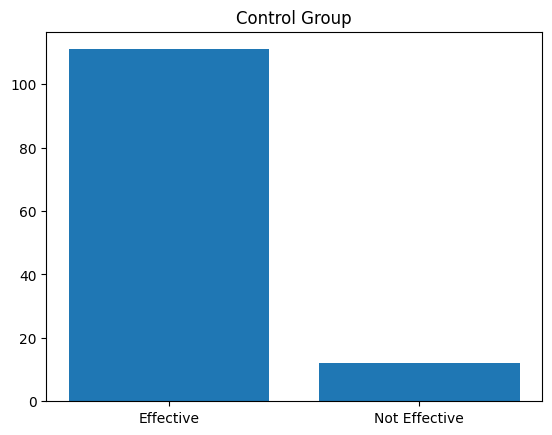

In [232]:
print(df_panss_control_diff['Effective'].value_counts(), '\n')
print(df_panss_control_diff['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_control_diff[df_panss_control_diff['Effective'] == True]), len(df_panss_control_diff[df_panss_control_diff['Effective'] == False])])
plt.title('Control Group')

In [233]:
df_panss['PatientID'].value_counts()

20001    9
20119    9
20164    9
20160    9
20148    9
        ..
20093    1
20154    1
20151    1
20141    1
20211    1
Name: PatientID, Length: 117, dtype: int64

In [234]:
df_panss['PatientID'].value_counts()[df_panss['PatientID'].value_counts() >= 3]

20001    9
20119    9
20164    9
20160    9
20148    9
        ..
20196    5
20028    4
20074    4
20205    3
20221    3
Name: PatientID, Length: 108, dtype: int64

In [235]:
df_panss_effective = pd.DataFrame(columns=['PatientID', 'Effective'])

for patient_id in df_panss['PatientID'].value_counts()[df_panss['PatientID'].value_counts() >= 3].index:
    patient_panss = df_panss[df_panss['PatientID'] == patient_id]
    effective = False
    for i in range(len(patient_panss) - 2):
        if patient_panss.iloc[i]['PANSS_Total'] > patient_panss.iloc[i + 1]['PANSS_Total'] > patient_panss.iloc[i + 2]['PANSS_Total']:
            effective = True
            break
    df_panss_effective = df_panss_effective.append({'PatientID': patient_id, 'Effective': effective}, ignore_index=True)
    
df_panss_effective

,PatientID,Effective
0,20001,False
1,20119,True
2,20164,True
3,20160,True
4,20148,True
...,...,...
103,20196,False
104,20028,True
105,20074,True
106,20205,True


True     99
False     9
Name: Effective, dtype: int64 

True     0.916667
False    0.083333
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Treatment Group')

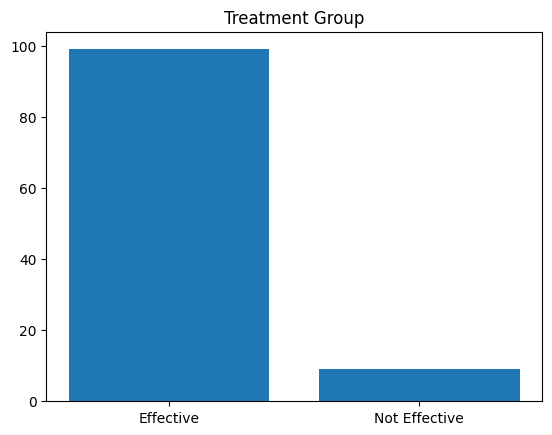

In [236]:
print(df_panss_effective['Effective'].value_counts(), '\n')
print(df_panss_effective['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_effective[df_panss_effective['Effective'] == True]), len(df_panss_effective[df_panss_effective['Effective'] == False])])
plt.title('Treatment Group')

In [237]:
df_panss_control

,PatientID,VisitDay,PANSS_Total
18,20003,0,79
35,20007,0,94
36,20007,17,102
37,20008,0,88
38,20008,18,82
...,...,...,...
1879,20240,33,91
1880,20240,47,81
1881,20240,75,83
1883,20240,168,76


In [238]:
df_panss_control['PatientID'].value_counts()

20118    9
20087    9
20112    9
20176    9
20100    9
        ..
20159    2
20037    1
20059    1
20066    1
20003    1
Name: PatientID, Length: 123, dtype: int64

In [239]:
df_panss_control['PatientID'].value_counts()[df_panss_control['PatientID'].value_counts() >= 3]

df_panss_control_effective = pd.DataFrame(columns=['PatientID', 'Effective'])

for patient_id in df_panss_control['PatientID'].value_counts()[df_panss_control['PatientID'].value_counts() >= 3].index:
    patient_panss = df_panss_control[df_panss_control['PatientID'] == patient_id]
    effective = False
    for i in range(len(patient_panss) - 2):
        if patient_panss.iloc[i]['PANSS_Total'] > patient_panss.iloc[i + 1]['PANSS_Total'] > patient_panss.iloc[i + 2]['PANSS_Total']:
            effective = True
            break
    df_panss_control_effective = df_panss_control_effective.append({'PatientID': patient_id, 'Effective': effective}, ignore_index=True)
    
df_panss_control_effective

,PatientID,Effective
0,20118,True
1,20087,True
2,20112,True
3,20176,True
4,20100,True
...,...,...
112,20186,True
113,20019,False
114,20058,False
115,20178,False


True     110
False      7
Name: Effective, dtype: int64 

True     0.940171
False    0.059829
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Control Group')

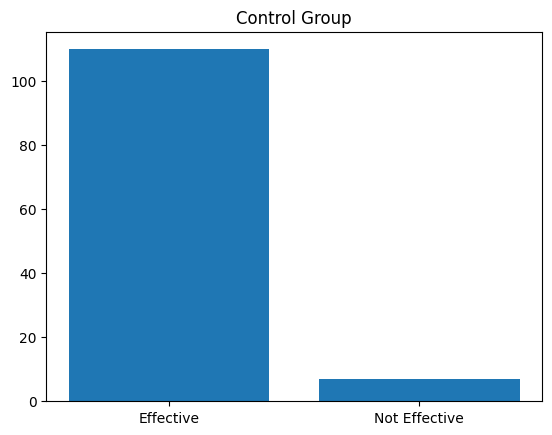

In [240]:
print(df_panss_control_effective['Effective'].value_counts(), '\n')
print(df_panss_control_effective['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_control_effective[df_panss_control_effective['Effective'] == True]), len(df_panss_control_effective[df_panss_control_effective['Effective'] == False])])
plt.title('Control Group')